In [1]:
import sys
sys.path.append('../')
import numpy as np
from IPython.display import HTML

from rover_simulator.sensor import ImaginalStereoCamera, ImaginalLiDAR
from rover_simulator.world import World
from rover_simulator.rover import BasicRover, RoverAnimation
from rover_simulator.history import SimpleHistory
from rover_simulator.navigation.localizer import ImaginalLocalizer
from rover_simulator.navigation.controller import ConstantSpeedController
from rover_simulator.navigation.mapper import GridMapper

In [2]:
world = World()
world.read_objects("../rover_simulator/examples/environment_simple.txt")

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

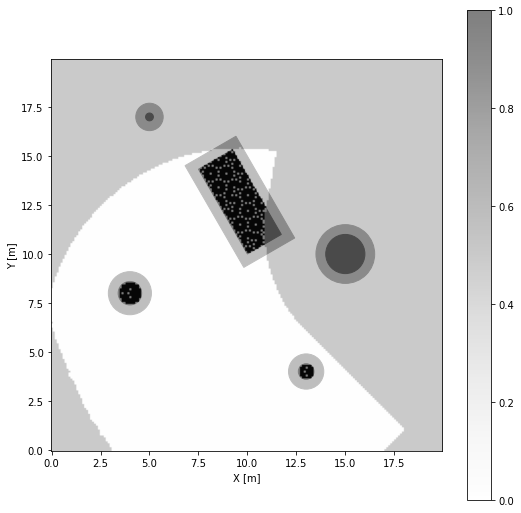

In [3]:
grid_width = 0.1
rover_r = 0.5
sensor = ImaginalStereoCamera(obstacles=world.obstacles)
mapper = GridMapper(grid_size=np.array([20, 20]), grid_width=grid_width, sensor=sensor, rover_r=rover_r)
history = SimpleHistory(sensor=sensor)

rover = BasicRover(
    np.array([18.0, 1.0, np.pi]), rover_r,
    sensor=sensor,
    mapper=mapper,
    localizer=ImaginalLocalizer(),
    controller=ConstantSpeedController(w=-np.pi/32),
    history=history
)
world.append_rover(rover)

world.reset(reset_rovers=False, reset_obstacles=False)
world.simulate(100)

mapper.draw(
    xlim=[0-mapper.grid_width/2, 20-mapper.grid_width/2],
    ylim=[0-mapper.grid_width/2, 20-mapper.grid_width/2],
    obstacles=world.obstacles,
    enlarge_range=rover.r
)

rover_animation = RoverAnimation(world, rover, None)
rover_animation.animate(
    #xlim=[0-rover.mapper.grid_width/2, 20-rover.mapper.grid_width/2], ylim=[0-rover.mapper.grid_width/2, 20-rover.mapper.grid_width/2],
    xlim=[0, 20], ylim=[0, 20],
    enlarge_range=rover.r,
    map_name='map',
    #save_path="mapper.mp4"
)
HTML(rover_animation.ani.to_jshtml())

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

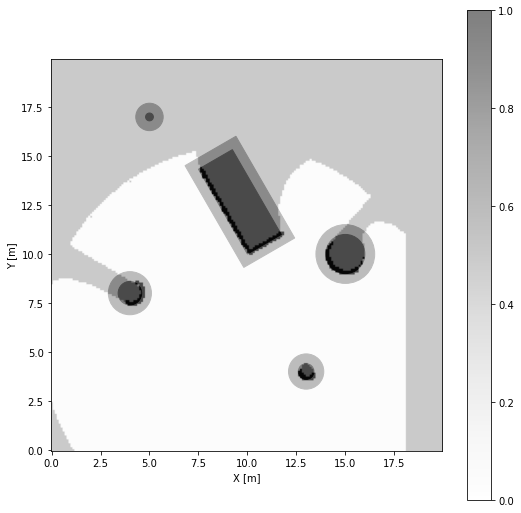

In [4]:
grid_width = 0.1
rover_r = 0.5
sensor = ImaginalLiDAR(obstacles=world.obstacles)
mapper = GridMapper(grid_size=np.array([20, 20]), grid_width=grid_width, sensor=sensor, rover_r=rover_r)
history = SimpleHistory(sensor=sensor)

rover = BasicRover(
    np.array([18.0, 1.0, np.pi]), rover_r,
    sensor=sensor,
    mapper=mapper,
    localizer=ImaginalLocalizer(),
    controller=ConstantSpeedController(w=-np.pi/32),
    history=history
)
world.append_rover(rover)

world.reset(reset_rovers=False, reset_obstacles=False)
world.simulate(100)

mapper.draw(
    xlim=[0-mapper.grid_width/2, 20-mapper.grid_width/2],
    ylim=[0-mapper.grid_width/2, 20-mapper.grid_width/2],
    obstacles=world.obstacles,
    enlarge_range=rover.r
)

rover_animation = RoverAnimation(world, rover, None)
rover_animation.animate(
    #xlim=[0-rover.mapper.grid_width/2, 20-rover.mapper.grid_width/2], ylim=[0-rover.mapper.grid_width/2, 20-rover.mapper.grid_width/2],
    xlim=[0, 20], ylim=[0, 20],
    enlarge_range=rover.r,
    map_name='map',
    #save_path="mapper.mp4"
)
HTML(rover_animation.ani.to_jshtml())